# Missing Category Imputation  
[source](https://www.youtube.com/watch?v=l_Wip8bEDFQ&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=37)  
replace the null category with literal like "Missing"

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("assets/train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of Houses')

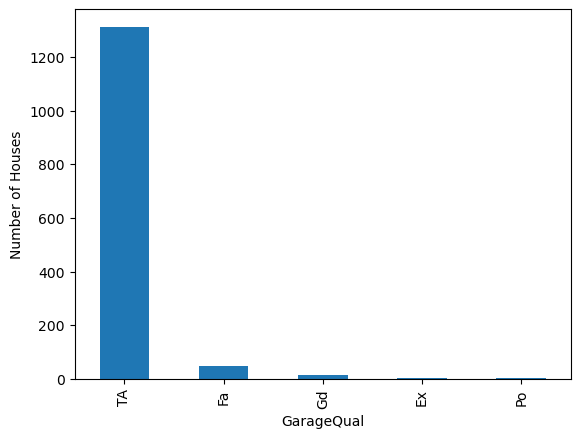

In [17]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel('Number of Houses')

In [18]:
df['GarageQual'].fillna('Missing',inplace=True)

C:\Users\jawwa\AppData\Local\Temp\ipykernel_17444\3265589431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('Missing',inplace=True)


<Axes: xlabel='GarageQual'>

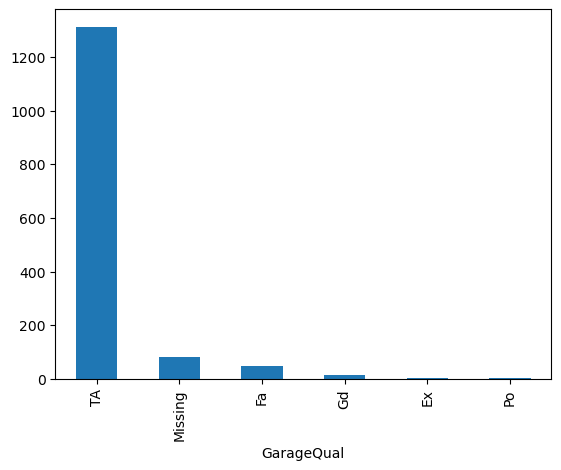

In [24]:
df['GarageQual'].value_counts().plot(kind='bar')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [20]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('SalePrice',axis=1),
                                                df['SalePrice'],
                                                test_size=0.2,
                                                random_state=42)

In [21]:
imputer  = SimpleImputer(strategy='constant',fill_value='Missing')

In [22]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [23]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)